# Привет!
## Это jupyter ноутбук с примером подгрузки и визуализации аудио файла.

С этого мы начнём знакомство с задачей верификации пользователей по голосу.

### I. Подгружаем необходимые библиотеки

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.decomposition import PCA
from scipy.io import wavfile
from scipy import signal

### II. Читаем аудио файл
sampling_frequency - частота дискретизации аудио файла, signal_data - сырые звуковые данные

In [3]:
sampling_frequency, signal_data = wavfile.read('../example_audio/1_1.wav')

In [4]:
signal_data.shape

(129921,)

In [5]:
sampling_frequency

16000

### III. Выводим звуковые данные на графики
Первый график - сырые звуковые данные (амплитуды), второй - данные, разложенные по частотам с помошью алгоритма FFT

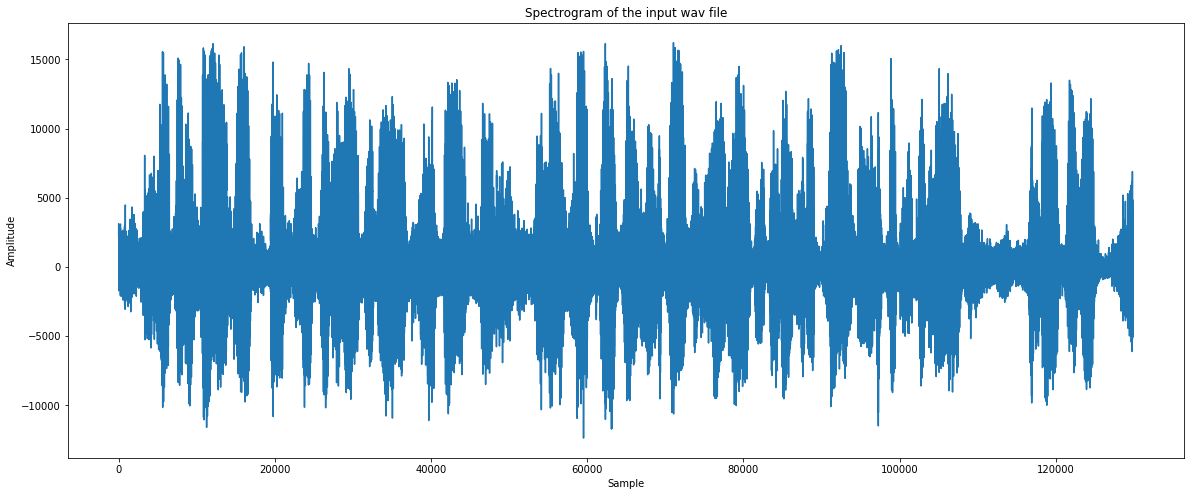

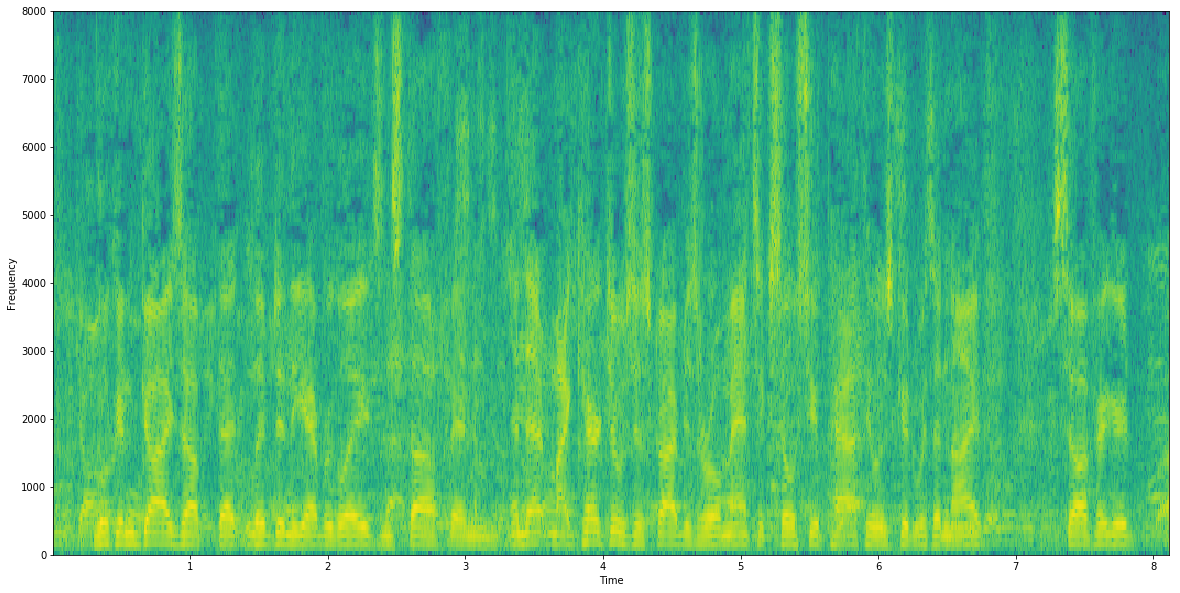

In [6]:
# Plot the signal read from wav file

plt.figure(figsize=(20,8))

plt.subplot()
plt.title('Spectrogram of the input wav file')
plt.plot(signal_data)
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.show()

plt.figure(figsize=(20,10))
plt.subplot()
plt.specgram(signal_data,Fs=sampling_frequency)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

### IV. Далее - шаблон под функцию, которая будет принимать на вход аудио файл, трансформированный с помощью FFT, и возвращать признаки (вектор или матрицу)
В первую очередь - предлагаю схлопнуть матрицу в вектор, как именно - придумайте :)

In [7]:
def spectrogram2features(spectrogram):
    return spectrogram

### V. Вычисляем спектрограмму для дальнейшей работы

In [8]:
frequencies, times, spectrogram = signal.spectrogram(signal_data, sampling_frequency)

In [9]:
frequencies.shape

(129,)

In [10]:
times.shape

(579,)

In [11]:
spectrogram.shape

(129, 579)

In [12]:
X = [spectrogram2features(spectrogram)]

### VI. Используем алгоритм PCA, чтобы разложить наши n-мерные вектора в 2-мерном пространстве (и посмотреть на них)
Для того, чтобы наглядно изучить, как аудио записи могут находиться относительно друг друга в пространстве, предлагаю в my_pca.fit_transform передавать матрицу с векторами, сгенерированных на основе разных аудиозаписей (сейчас там вектора - много фреймов из одной аудиозаписи).    
Документация по PCA - https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html, https://en.wikipedia.org/wiki/Principal_component_analysis

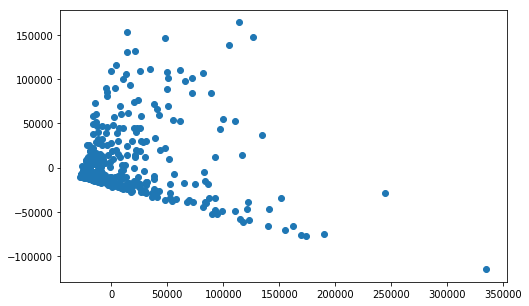

In [13]:
my_pca = PCA(n_components=2)
X_embedded = my_pca.fit_transform(spectrogram.transpose())
fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter(*np.transpose(X_embedded)) # звёздочка - специальная операция в Питоне, которая "разворачивает" список 'a', 'b' = *['a', 'b']